**Submitted By:** _Sariga M S_<br>
**Date:** _August 13,2023_

<div style="text-align: center;">
    <h1>Certified Specialist in Machine Learning and Artificial Intelligence</h1>
</div>

<div style="text-align: center;">
    <h1>Coding Test</h1>
</div>

<div style="text-align: center;">
    <h1>Sentiment Analysis on Movie Reviews</h1>
</div>

Movie review dataset of a popular review site is given:<br>
The sentiment of reviews is binary, meaning the rating < 5 results in a sentiment 
score of 0, and rating >=7 have a sentiment score of 1. No individual movie has 
more than 30 reviews. 
Data fields<br>
• id - Unique ID of each review<br>
• sentiment - Sentiment of the review; 1 for positive reviews and 0 for negative 
reviews<br>
• review - Text of the review<br>
Build a sentiment analysis model to classify movie reviews as positive or negative 
based on the text content. Utilize techniques such as word embeddings, word to 
vec, Bag of words etc. <br>
To accomplish this, you need to follow the below steps:<br>
• Data Preprocessing:<br>
• Feature Extraction:<br>
• Model Building and Evaluation:<br>
• Evaluate the model's performance <br>
• Give headings and detailed description to each step you are doing.<br>
• Create a repository in GitHub account as "Public".<br>
• Upload the notebook file (. ipynb) to the repository.<br>
• Please make sure that you are uploading the notebook file including the
outputs as well.<br>
• Share the link of this notebook from GitHub in the online text editor provided in 
Paatshala.<br>
• Click here for the dataset. <br>
NB: Tab separated file is given. Use sep=”\t” while reading the dataset. 

In [43]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re

In [44]:
# Lodaing the dataset

In [45]:
import pandas as pd

file_path = r"C:\Users\Dell\Downloads\labeledTrainData.tsv"
df = pd.read_csv(file_path, delimiter='\t')
print(df.head()) 

       id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...


## Exploratory Data Analysis

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [47]:
df.dtypes

id           object
sentiment     int64
review       object
dtype: object

In [48]:
df['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

Values of sentiment are in binary format. It is a well balanced dataset

In [49]:
# checking for missing values

In [50]:
df.isna().sum()

id           0
sentiment    0
review       0
dtype: int64

## Data preprocessing

Removing punctuation, special characters and converting text into lower case

In [51]:
def preprocess_text(text):
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Apply preprocessing function to the 'review' column
df['review'] = df['review'].apply(preprocess_text)
print(df['review'])

0        with all this stuff going down at the moment w...
1        the classic war of the worlds by timothy hines...
2        the film starts with a manager nicholas bell g...
3        it must be assumed that those who praised this...
4        superbly trashy and wondrously unpretentious s...
                               ...                        
24995    it seems like more consideration has gone into...
24996    i dont believe they made this film completely ...
24997    guy is a loser cant get girls needs to build u...
24998    this  minute documentary buñuel made in the ea...
24999    i saw this movie as a child and it broke my he...
Name: review, Length: 25000, dtype: object


### Removing stop words

In [52]:
from nltk.corpus import stopwords

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

df['review'] = df['review'].apply(lambda text: ' '.join(remove_stopwords(text.split())))
print(df['review'])

0        stuff going moment mj ive started listening mu...
1        classic war worlds timothy hines entertaining ...
2        film starts manager nicholas bell giving welco...
3        must assumed praised film greatest filmed oper...
4        superbly trashy wondrously unpretentious explo...
                               ...                        
24995    seems like consideration gone imdb reviews fil...
24996    dont believe made film completely unnecessary ...
24997    guy loser cant get girls needs build picked st...
24998    minute documentary buñuel made early one spain...
24999    saw movie child broke heart story unfinished e...
Name: review, Length: 25000, dtype: object


### Stemming

In [53]:
from nltk.stem import PorterStemmer

def apply_stemming(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

df['review'] = df['review'].apply(lambda text: ' '.join(apply_stemming(text.split())))
print(df['review'])

0        stuff go moment mj ive start listen music watc...
1        classic war world timothi hine entertain film ...
2        film start manag nichola bell give welcom inve...
3        must assum prais film greatest film opera ever...
4        superbl trashi wondrous unpretenti exploit hoo...
                               ...                        
24995    seem like consider gone imdb review film went ...
24996    dont believ made film complet unnecessari firs...
24997    guy loser cant get girl need build pick strong...
24998    minut documentari buñuel made earli one spain ...
24999    saw movi child broke heart stori unfinish end ...
Name: review, Length: 25000, dtype: object


### Lemmatization

In [54]:
from nltk.stem import WordNetLemmatizer

def apply_lemmatization(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens


df['review'] = df['review'].apply(lambda text: ' '.join(apply_lemmatization(text.split())))
print(df['review'])

0        stuff go moment mj ive start listen music watc...
1        classic war world timothi hine entertain film ...
2        film start manag nichola bell give welcom inve...
3        must assum prais film greatest film opera ever...
4        superbl trashi wondrous unpretenti exploit hoo...
                               ...                        
24995    seem like consider gone imdb review film went ...
24996    dont believ made film complet unnecessari firs...
24997    guy loser cant get girl need build pick strong...
24998    minut documentari buñuel made earli one spain ...
24999    saw movi child broke heart stori unfinish end ...
Name: review, Length: 25000, dtype: object


In [13]:
#### Tokenization using custom tokenizer

In [14]:
# def custom_tokenizer(text):
#     # Split the text into tokens
#     tokens = text.split()
#     return tokens
# tokens = custom_tokenizer(re)
# print(tokens)

# Feature Extraction, Model Building and Evaluation

In [55]:
X = df['review']
y = df['sentiment']

In [16]:
print(X)

0        stuff go moment mj ive start listen music watc...
1        classic war world timothi hine entertain film ...
2        film start manag nichola bell give welcom inve...
3        must assum prais film greatest film opera ever...
4        superbl trashi wondrous unpretenti exploit hoo...
                               ...                        
24995    seem like consider gone imdb review film went ...
24996    dont believ made film complet unnecessari firs...
24997    guy loser cant get girl need build pick strong...
24998    minut documentari buñuel made earli one spain ...
24999    saw movi child broke heart stori unfinish end ...
Name: review, Length: 25000, dtype: object


In [17]:
print(y)

0        1
1        1
2        0
3        0
4        1
        ..
24995    0
24996    0
24997    0
24998    0
24999    1
Name: sentiment, Length: 25000, dtype: int64


In [18]:
# splitting the dataset

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

## Applying Bag of Words

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
# Initialize the CountVectorizer
vectorizer = CountVectorizer(max_features=10000)
# Fit and transform the training data
X_train_bow = vectorizer.fit_transform(X_train)
# Transform the testing data using the same vectorizer
X_test_bow = vectorizer.transform(X_test)

In [21]:
X_train_bow.shape 

(20000, 10000)

We have 20,000 samples (reviews) and 107,291 features (unique words) in our training set

### Implementing Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_bow,y_train)
y_pred_rf = rf.predict(X_test_bow)

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy :",accuracy_score(y_test,y_pred_rf))
print("Confusion matrix :",confusion_matrix(y_test,y_pred_rf))

Accuracy : 0.8442
Confusion matrix : [[2122  381]
 [ 398 2099]]


### Implementing Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train_bow, y_train)

C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_pred_logreg = logreg_model.predict(X_test_bow)
print("Accuracy :",accuracy_score(y_test,y_pred_logreg))
print("Confusion matrix :",confusion_matrix(y_test,y_pred_logreg))

Accuracy : 0.862
Confusion matrix : [[2162  341]
 [ 349 2148]]


### Visualising the results

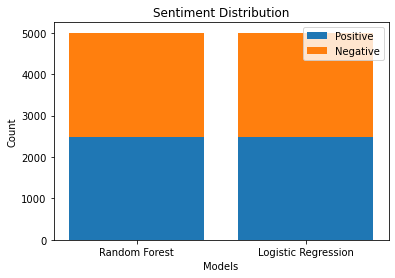

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of positive and negative predictions
positive_count_rf = sum(y_pred_rf)
negative_count_rf = len(y_pred_rf) - positive_count_rf

positive_count_logreg = sum(y_pred_logreg)
negative_count_logreg = len(y_pred_logreg) - positive_count_logreg

# Create a bar plot
labels = ['Random Forest', 'Logistic Regression']
positive_counts = [positive_count_rf, positive_count_logreg]
negative_counts = [negative_count_rf, negative_count_logreg]

x = range(len(labels))

plt.bar(x, positive_counts, label='Positive')
plt.bar(x, negative_counts, bottom=positive_counts, label='Negative')

plt.xlabel('Models')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.xticks(x, labels)
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import classification_report

# Print classification report for RF model
print("Classification Report for Random Forest Model:")
print(classification_report(y_test, y_pred_rf))

# Print classification report for LogReg model
print("Classification Report for Logistic Regression Model:")
print(classification_report(y_test, y_pred_logreg))

Classification Report for Random Forest Model:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      2503
           1       0.85      0.84      0.84      2497

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000

Classification Report for Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2503
           1       0.86      0.86      0.86      2497

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



## Implementing Word2vec

In [28]:
import genism

ModuleNotFoundError: No module named 'genism'

In [ ]:
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

I installed genism. Still its not working

## Implementing Tf-Idf

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
# Split the data into training and testing sets
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_tfidf)
# Transform the testing data 
X_test_tfidf = tfidf_vectorizer.transform(X_test_tfidf)

### Implementing Random Forest

In [32]:
# Initialize and train Random Forest classifier using TF-IDF features
rf_model_tfidf = RandomForestClassifier()
rf_model_tfidf.fit(X_train_tfidf, y_train_tfidf)

RandomForestClassifier()

In [33]:
# Predict sentiments on the testing set using the trained models
y_pred_rf_tfidf = rf_model_tfidf.predict(X_test_tfidf)

In [34]:
accuracy_rf_tfidf = accuracy_score(y_test_tfidf, y_pred_rf_tfidf)
report_rf_tfidf = classification_report(y_test_tfidf, y_pred_rf_tfidf)
print("Random Forest Model with TF-IDF features:")
print("Accuracy:", accuracy_rf_tfidf)
print("Classification Report:\n", report_rf_tfidf)

Random Forest Model with TF-IDF features:
Accuracy: 0.845
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      2481
           1       0.85      0.84      0.84      2519

    accuracy                           0.84      5000
   macro avg       0.85      0.85      0.84      5000
weighted avg       0.85      0.84      0.84      5000



### Implementing Logistic Regression

In [35]:
# Initialize and train Logistic Regression classifier using TF-IDF features
logreg_model_tfidf = LogisticRegression()
logreg_model_tfidf.fit(X_train_tfidf, y_train_tfidf)

LogisticRegression()

In [36]:
y_pred_logreg_tfidf = logreg_model_tfidf.predict(X_test_tfidf)

In [37]:
accuracy_logreg_tfidf = accuracy_score(y_test_tfidf, y_pred_logreg_tfidf)
report_logreg_tfidf = classification_report(y_test_tfidf, y_pred_logreg_tfidf)
print("\nLogistic Regression Model with TF-IDF features:")
print("Accuracy:", accuracy_logreg_tfidf)
print("Classification Report:\n", report_logreg_tfidf)


Logistic Regression Model with TF-IDF features:
Accuracy: 0.884
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      2481
           1       0.87      0.90      0.89      2519

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



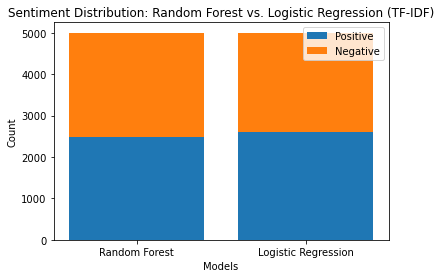

In [39]:
# Count the number of positive and negative predictions for both models
positive_count_rf = sum(y_pred_rf_tfidf)
negative_count_rf = len(y_pred_rf_tfidf) - positive_count_rf

positive_count_logreg = sum(y_pred_logreg_tfidf)
negative_count_logreg = len(y_pred_logreg_tfidf) - positive_count_logreg

# Create bar plot to visualize the sentiment distribution
labels = ['Random Forest', 'Logistic Regression']
positive_counts = [positive_count_rf, positive_count_logreg]
negative_counts = [negative_count_rf, negative_count_logreg]

x = range(len(labels))

plt.bar(x, positive_counts, label='Positive')
plt.bar(x, negative_counts, bottom=positive_counts, label='Negative')

plt.xlabel('Models')
plt.ylabel('Count')
plt.title('Sentiment Distribution: Random Forest vs. Logistic Regression (TF-IDF)')
plt.xticks(x, labels)
plt.legend()
plt.show()

# Conclusion

**It appears that the Logistic Regression models consistently outperform the Random Forest models in terms of accuracy across both TF-IDF and Bag of Words features. Logistic Regression shows slightly higher precision and recall for both positive and negative sentiments, indicating better overall performance compared to Random Forest in this particular sentiment analysis task.**

### Custom sentiment anlaysis in the review

In [58]:
text = X.str.cat(sep=' ')

In [59]:
def custom_tokenizer(text):
    tokens = text.split()
    return tokens
tokens = custom_tokenizer(text)

In [60]:
from nltk.sentiment import SentimentIntensityAnalyzer

def keyword_extraction(reviews):
    keyword_scores = {}
    analyzer = SentimentIntensityAnalyzer()

    for review in reviews:
        sentiment_scores = analyzer.polarity_scores(review)
        words = review.split()
        for word in words:
            if word not in keyword_scores:
                keyword_scores[word] = []
            keyword_scores[word].append(sentiment_scores['compound'])

    return keyword_scores

In [61]:
# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# Initialize a dictionary to store keyword sentiment scores
keyword_scores = {}
# Iterate through each word in tokens and apply SentimentIntensityAnalyzer
for word in tokens:
    sentiment_scores = analyzer.polarity_scores(word)
    
    if word not in keyword_scores:
        keyword_scores[word] = []
    keyword_scores[word].append(sentiment_scores['compound'])

In [62]:
def positive_negative(keyword_scores, threshold=0.2):
    positive_words = []
    negative_words = []

    for word, scores in keyword_scores.items():
        average_score = sum(scores) / len(scores)
        if average_score >= threshold:
            positive_words.append(word)
        elif average_score <= -threshold:
            negative_words.append(word)

    return positive_words, negative_words

In [66]:
positive_words, negative_words = positive_negative(keyword_scores)
print("Positive words:", positive_words)

Positive words: ['certain', 'cool', 'impress', 'like', 'consent', 'fan', 'true', 'nice', 'talent', 'grace', 'well', 'hope', 'entertain', 'great', 'faith', 'enjoy', 'novel', 'astound', 'good', 'special', 'vigor', 'better', 'greatest', 'care', 'play', 'allow', 'kind', 'superior', 'hooray', 'laughter', 'diamond', 'sure', 'fun', 'magnific', 'attract', 'god', 'brilliant', 'friend', 'glad', 'curious', 'straight', 'success', 'comedian', 'clear', 'support', 'superb', 'top', 'recommend', 'warmth', 'love', 'best', 'ok', 'credit', 'hand', 'wise', 'dream', 'gain', 'interest', 'award', 'worth', 'ha', 'laugh', 'yeah', 'excel', 'strong', 'vital', 'bless', 'fine', 'treat', 'fair', 'grant', 'grand', 'hero', 'wow', 'protect', 'easier', 'survivor', 'comfort', 'pleasant', 'lover', 'vision', 'save', 'accept', 'wish', 'passion', 'win', 'humor', 'joke', 'commit', 'benefit', 'applaud', 'trust', 'charm', 'delight', 'help', 'clever', 'stronger', 'super', 'fame', 'okay', 'popular', 'favour', 'truth', 'rich', 'fi

In [68]:
print("Negative words:", negative_words)

Negative words: ['odd', 'bad', 'hate', 'bore', 'egotist', 'dead', 'rant', 'stupid', 'liar', 'war', 'critic', 'restrict', 'attack', 'fight', 'danger', 'scare', 'violent', 'stuck', 'imperfect', 'lack', 'fear', 'pervert', 'sick', 'brutal', 'smuggler', 'fire', 'retard', 'hurt', 'evil', 'witch', 'drag', 'avoid', 'gun', 'lost', 'worst', 'mad', 'shameless', 'interrupt', 'problem', 'ill', 'horror', 'insult', 'worthless', 'disturb', 'lose', 'depress', 'poor', 'disappoint', 'low', 'dull', 'suck', 'damn', 'doubt', 'forget', 'loss', 'trap', 'murder', 'scandal', 'shoot', 'uncertain', 'derail', 'lame', 'frighten', 'kill', 'stink', 'killer', 'tension', 'crap', 'die', 'victim', 'pain', 'accident', 'conflict', 'wrong', 'expel', 'difficult', 'insipid', 'embarrass', 'cheat', 'sad', 'dire', 'betray', 'rude', 'crude', 'cynic', 'disrespect', 'tragic', 'poison', 'miser', 'disgust', 'dupe', 'suffer', 'ruin', 'dumb', 'steal', 'loser', 'cruel', 'suspect', 'boredom', 'harass', 'fool', 'slut', 'abandon', 'hell', 

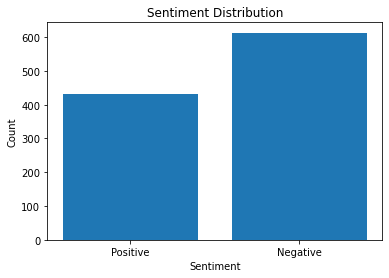

In [69]:
def sentiment_analysis(positive_words, negative_words):
    positive_counts = len(positive_words)
    negative_counts = len(negative_words)

    plt.bar(['Positive', 'Negative'], [positive_counts, negative_counts])
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.title('Sentiment Distribution')
    plt.show()

# Replace positive_words and negative_words with your actual lists of positive and negative words
your_positive_words = ['certain', 'cool', 'impress', 'like', 'consent', 'fan', 'true', 'nice', 'talent', 'grace', 'well', 'hope', 'entertain', 'great', 'faith', 'enjoy', 'novel', 'astound', 'good', 'special', 'vigor', 'better', 'greatest', 'care', 'play', 'allow', 'kind', 'superior', 'hooray', 'laughter', 'diamond', 'sure', 'fun', 'magnific', 'attract', 'god', 'brilliant', 'friend', 'glad', 'curious', 'straight', 'success', 'comedian', 'clear', 'support', 'superb', 'top', 'recommend', 'warmth', 'love', 'best', 'ok', 'credit', 'hand', 'wise', 'dream', 'gain', 'interest', 'award', 'worth', 'ha', 'laugh', 'yeah', 'excel', 'strong', 'vital', 'bless', 'fine', 'treat', 'fair', 'grant', 'grand', 'hero', 'wow', 'protect', 'easier', 'survivor', 'comfort', 'pleasant', 'lover', 'vision', 'save', 'accept', 'wish', 'passion', 'win', 'humor', 'joke', 'commit', 'benefit', 'applaud', 'trust', 'charm', 'delight', 'help', 'clever', 'stronger', 'super', 'fame', 'okay', 'popular', 'favour', 'truth', 'rich', 'fit', 'silliest', 'admit', 'pride', 'kiss', 'funniest', 'gift', 'sweetheart', 'thrill', 'succeed', 'free', 'join', 'clean', 'huge', 'strongest', 'humour', 'swift', 'highlight', 'perfect', 'enthusiasm', 'smart', 'smile', 'joy', 'retreat', 'splendid', 'jp', 'greater', 'accomplish', 'share', 'compassion', 'relax', 'cute', 'proud', 'strength', 'glee', 'thank', 'bright', 'compliment', 'richest', 'warm', 'merit', 'sweet', 'funnier', 'honor', 'richer', 'creation', 'heaven', 'fresh', 'respect', 'brave', 'triumph', 'winning', 'safe', 'luck', 'heroic', 'casual', 'safeguard', 'favor', 'prize', 'ideal', 'progress', 'bliss', 'greet', 'marvel', 'ty', 'splendor', 'forgiven', 'eager', 'smug', 'commend', 'champion', 'championship', 'worship', 'holiday', 'reward', 'keen', 'wisdom', 'friendship', 'yep', 'cheer', 'bold', 'hallelujah', 'glamor', 'doubtless', 'cheerlead', 'helper', 'freedom', 'pray', 'alert', 'vibrant', 'alright', 'expand', 'dear', 'honest', 'aok', 'enthusiast', 'winner', 'relief', 'spark', 'freeman', 'xp', 'flawless', 'profit', 'faultless', 'urgent', 'giver', 'avid', 'jewel', 'cherish', 'lol', 'brighter', 'neat', 'woo', 'pleaser', 'robust', 'heartfelt', 'adorn', 'easiest', 'grin', 'calm', 'bargain', 'harmless', 'romantic', 'earnest', 'prospect', 'haha', 'intellect', 'fond', 'successor', 'buoyant', 'amor', 'enlighten', 'freed', 'brighten', 'loyal', 'chic', 'yay', 'boost', 'intelligentsia', 'wealth', 'smiley', 'prettier', 'medal', 'champ', 'sillier', 'fervent', 'jokey', 'gleeful', 'vigour', 'optimist', 'charmer', 'warmer', 'dearest', 'pardon', 'smarter', 'ardent', 'beautician', 'acquit', 'kinder', 'perfectionist', 'growth', 'cutest', 'agreement', 'fave', 'virtuoso', 'ff', 'libertarian', 'happier', 'intact', 'fab', 'gracious', 'asset', 'wiser', 'affection', 'grandeur', 'heroism', 'fyi', 'tx', 'glamour', 'debonair', 'jt', 'devote', 'nicer', 'idealist', 'truer', 'benign', 'troubleshoot', 'lighthearted', 'jj', 'radiant', 'kewl', 'proudest', 'xd', 'safer', 'triumphant', 'brightest', 'salient', 'friendlier', 'grateful', 'wisest', 'hug', 'gentler', 'tia', 'fearless', 'honour', 'cleverest', 'humorist', 'wealthier', 'bolder', 'desire', 'gallant', 'grander', 'impression', 'gorgeous', 'glorious', 'genial', 'ilu', 'benefic', 'partier', 'rotflmao', 'fad', 'supremo', 'fav', 'jovial', 'foolproof', 'bonus', 'prettiest', 'funner', 'qt', 'heavenward', 'beaut', 'hak', 'hahaha', 'wealthiest', 'trueness', 'neatest', 'vitamin', 'cuter', 'luckiest', 'hurrah', 'merriest', 'strengthen', 'splendour', 'roflmao', 'thx', 'joyous', 'beautiful', 'laugher', 'calmer', 'powerful', 'happiest', 'nicest', 'steadfast', 'funnest', 'grandest', 'mirth', 'lmao', 'convinced', 'wells', 'euphoria', 'truest', 'hurray', 'merriment', 'bff', 'impressionist', 'kudos', 'merrier', 'painless', 'smartest', 'vip', 'godsend', 'sincerest', 'kissing', 'surer', 'livelihood', 'wonderful', 'woot', 'wd', 'lenient', 'bravest', 'loving', 'gg', 'prouder', 'rofl', 'smarten', 'liveliest', 'excellent', 'tgif', 'handsomest', 'woohoo', 'jw', 'gt', 'admire', 'friendliest', 'freeform', 'spirited', 'wilco', 'loyalist', 'prepared', 'dauntless', 'boldest', 'adore', 'outreach', 'surest', 'freer', 'warmhearted', 'meaningful', 'kk', 'original', 'sunniest', 'sunnier', 'freedman', 'gentlest', 'useful', 'precious', 'gla', 'warmest', 'perfection', 'ez', 'kisser', 'mwah', 'cheerio', 'supporter', 'funnyman', 'beautifulest', 'safest', 'luckier', 'smiler']
your_negative_words = ['odd', 'bad', 'hate', 'bore', 'egotist', 'dead', 'rant', 'stupid', 'liar', 'war', 'critic', 'restrict', 'attack', 'fight', 'danger', 'scare', 'violent', 'stuck', 'imperfect', 'lack', 'fear', 'pervert', 'sick', 'brutal', 'smuggler', 'fire', 'retard', 'hurt', 'evil', 'witch', 'drag', 'avoid', 'gun', 'lost', 'worst', 'mad', 'shameless', 'interrupt', 'problem', 'ill', 'horror', 'insult', 'worthless', 'disturb', 'lose', 'depress', 'poor', 'disappoint', 'low', 'dull', 'suck', 'damn', 'doubt', 'forget', 'loss', 'trap', 'murder', 'scandal', 'shoot', 'uncertain', 'derail', 'lame', 'frighten', 'kill', 'stink', 'killer', 'tension', 'crap', 'die', 'victim', 'pain', 'accident', 'conflict', 'wrong', 'expel', 'difficult', 'insipid', 'embarrass', 'cheat', 'sad', 'dire', 'betray', 'rude', 'crude', 'cynic', 'disrespect', 'tragic', 'poison', 'miser', 'disgust', 'dupe', 'suffer', 'ruin', 'dumb', 'steal', 'loser', 'cruel', 'suspect', 'boredom', 'harass', 'fool', 'slut', 'abandon', 'hell', 'suspicion', 'shame', 'bomb', 'punish', 'error', 'rob', 'unkind', 'scream', 'puke', 'fatal', 'heartbreak', 'weakest', 'torn', 'disappear', 'crime', 'threaten', 'arrest', 'stop', 'dump', 'rape', 'block', 'harsh', 'idiot', 'death', 'freak', 'spite', 'greed', 'anger', 'fail', 'vain', 'paranoia', 'broken', 'weep', 'weak', 'distract', 'beaten', 'gag', 'debt', 'villain', 'heroin', 'devil', 'prison', 'ugh', 'cut', 'annoy', 'fallen', 'hater', 'phobic', 'crash', 'upset', 'destroy', 'selfish', 'regret', 'fiasco', 'sadden', 'numb', 'blind', 'cancel', 'paranoid', 'clueless', 'rage', 'harm', 'haunt', 'po', 'defeat', 'stab', 'stammer', 'inferior', 'gross', 'dread', 'fake', 'lowest', 'tumor', 'pessimist', 'terror', 'smother', 'timid', 'rapist', 'blame', 'stolen', 'thief', 'fright', 'pu', 'shylock', 'guilt', 'ghost', 'complaint', 'moron', 'reject', 'stress', 'sluggish', 'boring', 'drop', 'hardship', 'worn', 'weaker', 'propaganda', 'hellish', 'aggress', 'powerless', 'stinko', 'doomsday', 'combat', 'lower', 'forgotten', 'cancer', 'terrorist', 'bother', 'stinker', 'horrid', 'vile', 'broke', 'risk', 'grave', 'dismal', 'censor', 'ban', 'complain', 'flop', 'shock', 'suspend', 'assault', 'shyster', 'feud', 'slam', 'geek', 'forbidden', 'mess', 'bitter', 'darkest', 'fag', 'fu', 'repress', 'molest', 'delay', 'drunk', 'childish', 'unclear', 'careless', 'disillusion', 'whine', 'devilish', 'wreck', 'havoc', 'woe', 'fault', 'sorrow', 'weeper', 'misunderstood', 'threat', 'anguish', 'mourn', 'neglect', 'dumber', 'doom', 'toothless', 'sucker', 'robber', 'distort', 'racist', 'struck', 'distrust', 'heartless', 'woeful', 'leak', 'slash', 'racism', 'somber', 'offend', 'bullshit', 'weapon', 'grim', 'nastier', 'panic', 'grief', 'trite', 'misunderstand', 'helpless', 'hopeless', 'cramp', 'discard', 'mindless', 'rotten', 'foe', 'cheerless', 'exhaust', 'nerd', 'coward', 'meaningless', 'lament', 'treason', 'sin', 'goddamn', 'mistaken', 'dirt', 'wimp', 'unfair', 'ass', 'talentless', 'despair', 'drown', 'protest', 'peril', 'stall', 'temper', 'stupidest', 'decay', 'mock', 'lone', 'loner', 'snafu', 'chagrin', 'jerk', 'fought', 'argument', 'dick', 'sarcasm', 'uptight', 'destruct', 'dumbass', 'whore', 'cruelest', 'inhibit', 'shrew', 'distraught', 'masochist', 'disregard', 'bastard', 'sob', 'jackass', 'reek', 'scumbag', 'mischief', 'dumbest', 'disquiet', 'lamest', 'snob', 'foolish', 'fraud', 'trickster', 'scarecrow', 'sore', 'dud', 'riot', 'saddest', 'teaser', 'anti', 'disdain', 'bribe', 'scam', 'scorn', 'flunk', 'bitch', 'skeptic', 'resign', 'wtf', 'overload', 'deceit', 'antagonist', 'lurk', 'contradict', 'stubborn', 'battlefield', 'lag', 'snobbish', 'condemn', 'fascist', 'maniac', 'frantic', 'ugliest', 'poorest', 'graveyard', 'defect', 'trauma', 'stunk', 'contempt', 'useless', 'sluttiest', 'restless', 'ennui', 'poorer', 'chaotic', 'anxious', 'phobia', 'dishearten', 'fuck', 'louse', 'hoax', 'weirdo', 'hapless', 'loom', 'nag', 'charmless', 'detain', 'no', 'overweight', 'choke', 'overreact', 'stealer', 'boycott', 'burden', 'furious', 'bummer', 'stank', 'unjust', 'sullen', 'rancid', 'turmoil', 'scapegoat', 'zealot', 'totalitarian', 'sicken', 'forbid', 'bankrupt', 'deject', 'banish', 'dirtiest', 'spiritless', 'discord', 'dearth', 'dx', 'alarm', 'dork', 'dorkiest', 'hysteria', 'battleground', 'flu', 'dumbstruck', 'shakedown', 'aghast', 'stricken', 'cruder', 'miserably', 'reckless', 'duller', 'graver', 'sadder', 'piss', 'lowbrow', 'wowser', 'lamer', 'gloom', 'nervous', 'defiant', 'shit', 'dismay', 'dishonest', 'stench', 'dullard', 'shyness', 'freakiest', 'mope', 'distress', 'murderess', 'wiseass', 'discomfort', 'rash', 'vicious', 'passionless', 'mia', 'humorless', 'screwup', 'fume', 'hunger', 'scold', 'gloomier', 'smear', 'hooligan', 'freakish', 'grievous', 'downcast', 'pity', 'weaken', 'feudal', 'weirdest', 'grouch', 'uglier', 'smog', 'lowliest', 'dullest', 'worsen', 'crueler', 'cheater', 'deficit', 'crudest', 'nastiest', 'scarey', 'joyless', 'faggot', 'whiner', 'harsher', 'tantrum', 'emptiest', 'glum', 'sluttish', 'lowlight', 'wicked', 'painful', 'mourner', 'bitchy', 'stutter', 'sceptic', 'kia', 'defenseless', 'isolation', 'lawsuit', 'denier', 'aggressor', 'prick', 'killjoy', 'freakout', 'walkout', 'grime', 'thoughtless', 'defer', 'worser', 'abhor', 'defeatist', 'lousier', 'crestfallen', 'jealous', 'tard', 'douchebag', 'cruellest', 'doubter', 'angrier', 'misread', 'comedown', 'grossest', 'spam', 'pileup', 'incompetent', 'goddam', 'lamebrain', 'luckless', 'laziest', 'friendless', 'snub', 'heartbroken', 'deadlock', 'grimmer', 'whiney', 'dubious', 'fubar', 'lousiest', 'pita', 'suicide', 'contagion', 'lowdown', 'wth', 'paranoiac', 'dullish', 'dreadful', 'wimpiest', 'madder', 'riskiest', 'piteous', 'damned', 'disaster', 'rudest', 'mofo', 'wept', 'nosey', 'cancelled', 'retarded', 'awol', 'gravest', 'pitiless', 'twat', 'disjointed', 'mooch', 'dirtier', 'trickiest', 'contradictor', 'awful', 'griever', 'evilest', 'tired', 'faithless', 'freeload', 'screwiest', 'screwer', 'dumbfounded', 'shittier', 'chucklehead', 'sux', 'neurotic', 'appalling', 'harshest', 'shameful', 'ruinous', 'remorseless', 'grimmest', 'damnit', 'fud', 'doa', 'hurter', 'fraudster', 'dumper', 'nigger', 'huckster', 'snobbism', 'silliness', 'shyer', 'wimpish', 'pathetical', 'stinkpot', 'worrywart', 'lowish']

# Call the sentiment_analysis function and provide the positive_words and negative_words as arguments
sentiment_analysis(your_positive_words, your_negative_words)

                                                      -***-